# Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import torchvision
from tqdm import tqdm_notebook as tqdm

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

from visualization.plots import plot_learning_curves

from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
import seaborn as sns

In [2]:
from pathlib import Path
import re

# Save loss curves

In [49]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs'

for path, dirs, files in os.walk(parent_dir):
    for filename in files:
        if filename.startswith('loss_curve') and filename.endswith('.npy'):
            curve = np.load(os.path.join(path, filename))
            fig = plt.figure()
            x = np.arange(len(curve))/46.0
            plt.plot(x, curve)
            plt.grid()
            plot_f_name = os.path.join(path, filename.replace('.npy','.png'))
            if os.path.isfile(plot_f_name):
               os.remove(plot_f_name)
            plt.savefig(plot_f_name)
            plt.close(fig)

In [4]:
3680/46

80.0

In [5]:
460/46

10.0

# Weight Alignment

In [3]:
def pairwise_cos_dist(net):
    w = net.dense_1.weight.data.cpu()
    b = net.dense_1.bias.data.cpu()
    w1 = w/b.unsqueeze(1)

    num_neurons = w.shape[0]
    cd = cosine_similarity(w1,w1)
    d = euclidean_distances(w1,w1)
    iu2 = np.triu_indices(num_neurons, k=1)
    
    return d[iu2], cd[iu2], cd

In [98]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs'

for path, dirs, files in os.walk(parent_dir):
    for dirname in dirs:
        if dirname.startswith('run'):
            cosine_sims = []
            corr_matrices = []
            euc_dists = []
            if 'train_from_scratch' in path:
                offset = 0
            elif 'smart_init' in path:
                offset = 40
                teacher_dir = Path(path).parents[2]
                num_neurons = int(path[60:].split(' ')[0])
                teacher_dir = os.path.join(teacher_dir, str(num_neurons//2) + ' neurons/train_from_scratch/weight_history/run_' + dirname[-1:])
#                 euc_dists = list(np.load(os.path.join(teacher_dir, 'euc_dists.npy')))
#                 cosine_sims = list(np.load(os.path.join(teacher_dir, 'cosine_sims.npy')))[:40]
#                 corr_matrices = list(np.load(os.path.join(teacher_dir, 'corr_matrices.npy')))[:40]
            num_epochs = len([f for f in os.listdir(os.path.join(path, dirname)) if f.endswith('.pt')])
            for i in range(num_epochs):
                net = torch.load(os.path.join(path, dirname, 'epoch_' + str(i + offset + 1) + '.pt'))
                d, cd, cd_full = pairwise_cos_dist(net)
                cosine_sims.append(cd)
                corr_matrices.append(cd_full)
                euc_dists.append(d)
                
#             print([x.shape for x in cosine_sims])
            cosine_sims = np.vstack(cosine_sims)
            corr_matrices = np.vstack(corr_matrices)
            euc_dists = np.vstack(euc_dists)
            
            np.save(os.path.join(path, dirname, 'cosine_sims'), cosine_sims)
            np.save(os.path.join(path, dirname, 'corr_matrices'), corr_matrices)
            np.save(os.path.join(path, dirname, 'euc_dists'), euc_dists)
            fig = plt.figure()
            plt.plot(np.mean(cosine_sims, axis=1))
            plt.grid()
            plot_f_name = os.path.join(path, dirname, 'mean_cosine_sims.png')
            if os.path.isfile(plot_f_name):
               os.remove(plot_f_name)
            plt.savefig(plot_f_name)
            plt.close(fig)

            fig = plt.figure()
            plt.plot(np.mean(euc_dists, axis=1))
            plt.grid()
            plot_f_name = os.path.join(path, dirname, 'mean_euc_dists.png')
            if os.path.isfile(plot_f_name):
               os.remove(plot_f_name)
            plt.savefig(plot_f_name)
            plt.close(fig)

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.simpleFCNet' has changed. you can retriev

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'nets.simpleNet.FCNet' has changed. you can retrieve the original sou

FileNotFoundError: [Errno 2] No such file or directory: '/home/manu/Projects/dev/weightSymmetry/logs/2 hidden layers/40 neurons/smart_init_noise/weight_history/run_2/epoch_81.pt'

In [79]:
list(np.ones([2,3]))

[array([1., 1., 1.]), array([1., 1., 1.])]

In [116]:
cosine_sims.shape

(80, 10)

In [7]:
d

array([106.51664 , 304.36523 , 102.60324 , 110.9588  , 270.47522 ,
        31.858688,  32.89395 , 274.24408 , 275.68335 ,  30.882345],
      dtype=float32)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib qt

def scrollable_loss_vs_hist(parent_dir, run_num, idxes=None, ylim=None, net2net=False):
    
    weight_logdir = parent_dir + 'weight_history/run_' + str(run_num)
    x = np.load(os.path.join(weight_logdir, 'cosine_sims.npy'))
    
    offset = 0

    loss_curve = np.load(parent_dir + 'loss_curve_' + str(run_num) + '.npy')
    
    if idxes is None:
        if net2net:
            idxes = np.arange(40)
            offset = 40
        else:
            idxes = np.arange(80)
    batch_idxes = [46*(i + offset) for i in idxes]
    plots = x[idxes]

    # define your x and y arrays to be plotted
    # t = np.linspace(start=0, stop=2*np.pi, num=100)
    # y1 = np.cos(t)
    # y2 = np.sin(t)
    # y3 = np.tan(t)
    # plots = [(t,y1), (t,y2), (t,y3)]

    # now the real code :) 
    global curr_pos
    curr_pos = 0

    def key_event(e):
        global curr_pos

        if e.key == "right":
            curr_pos = curr_pos + 1
        elif e.key == "left":
            curr_pos = curr_pos - 1
        else:
            return
        curr_pos = curr_pos % len(plots)


        ax1.cla()
        ax1.plot(loss_curve)
        ax1.plot(batch_idxes[curr_pos], loss_curve[batch_idxes[curr_pos]], marker='o')

        ax2.cla()
        ax2.hist(plots[curr_pos], bins=20)
        ax2.set_xlim([-1, 1])
        if ylim is not None:
            ax2.set_ylim([0, ylim])
        fig.canvas.draw()

    fig = plt.figure()
    fig.canvas.mpl_connect('key_press_event', key_event)
    ax1 = fig.add_subplot(211)
    ax1.plot(loss_curve)
    ax1.plot(batch_idxes[0], loss_curve[batch_idxes[0]], marker='o')

    ax2 = fig.add_subplot(212)
    ax2.hist(plots[0], bins=20)
    ax2.set_xlim([-1, 1])
    if ylim is not None:
        ax2.set_ylim([0, ylim])
    plt.show()   

In [22]:
%matplotlib qt

def scrollable_loss_vs_heatmap(parent_dir, run_num, idxes=None, ylim=None):
    
    weight_logdir = parent_dir + 'weight_history/run_' + str(run_num)
    x = np.load(os.path.join(weight_logdir, 'corr_matrices.npy'))

    loss_curve = np.load(parent_dir + 'loss_curve_' + str(run_num) + '.npy')
    
    if idxes is None:
        idxes = np.arange(80)
    batch_idxes = [46*i for i in idxes]
    plots = x[idxes]

    # now the real code :) 
    global curr_pos
    curr_pos = 0

    def key_event(e):
        global curr_pos

        if e.key == "right":
            curr_pos = curr_pos + 1
        elif e.key == "left":
            curr_pos = curr_pos - 1
        else:
            return
        curr_pos = curr_pos % len(plots)

        ax1.cla()
        ax1.plot(loss_curve)
        ax1.plot(batch_idxes[curr_pos], loss_curve[batch_idxes[curr_pos]], marker='o')

        ax2.cla()
        ax2.imshow(x[curr_pos], cmap='hot', interpolation='nearest')
        fig.canvas.draw()

    fig = plt.figure()
    fig.canvas.mpl_connect('key_press_event', key_event)
    ax1 = fig.add_subplot(211)
    ax1.plot(loss_curve)
    ax1.plot(batch_idxes[0], loss_curve[batch_idxes[0]], marker='o')

    ax2 = fig.add_subplot(212)
    ax2.imshow(x[0], cmap='hot', interpolation='nearest')
    plt.show()

In [5]:
def loss_vs_angle(parent_dir, run_num):
    weight_logdir = parent_dir + 'weight_history/run_' + str(run_num)
    x = np.load(os.path.join(weight_logdir, 'cosine_sims.npy'))

    loss_curve = np.load(parent_dir + 'loss_curve_' + str(run_num) + '.npy')
    
    fig = plt.figure(figsize=(6,9))
    ax1 = fig.add_subplot(311)
    ax1.plot(loss_curve)

    ax2 = fig.add_subplot(312)
    ax2.plot(np.arccos(np.max(x, axis=1)))

    ax3 = fig.add_subplot(313)
    ax3.plot(np.arccos(np.median(x, axis=1)))
    plt.show()

In [53]:
# %matplotlib qt

parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/2 hidden layers/80 neurons/train_from_scratch/'
run_num = 3
idxes = [1, 10, 20, 30, 40, 50, 60]
ylim = 650

# scrollable_loss_vs_hist(parent_dir, run_num, ylim=ylim)
loss_vs_angle(parent_dir, run_num)
# scrollable_loss_vs_heatmap(parent_dir, run_num)

In [76]:
# %matplotlib qt

parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/2 hidden layers/10 neurons/smart_init_noise/'
run_num = 2
idxes = [1, 10, 20, 30, 40, 50, 60]
ylim = 50

scrollable_loss_vs_hist(parent_dir, run_num, ylim=ylim, net2net=True)
# loss_vs_angle(parent_dir, run_num)
# scrollable_loss_vs_heatmap(parent_dir, run_num)

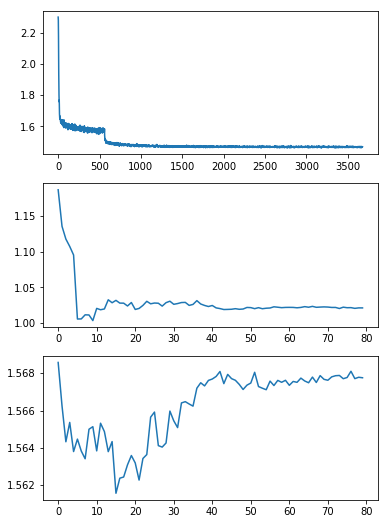

In [20]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/2 hidden layers/80 neurons/train_from_scratch/'
run_num = 3
idxes = [1, 10, 20, 30, 40, 50, 60]
ylim = 650

# scrollable_loss_vs_hist(parent_dir, run_num, ylim=ylim)
loss_vs_angle(parent_dir, run_num)
# scrollable_loss_vs_heatmap(parent_dir, run_num)

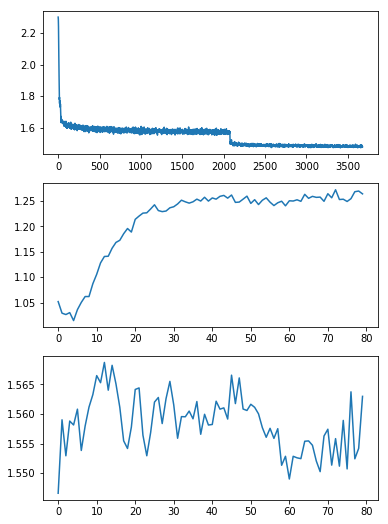

In [19]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/2 hidden layers/20 neurons/train_from_scratch/'
run_num = 0
idxes = [1, 10, 20, 30, 40, 50, 60]
ylim = 35

# scrollable_loss_vs_hist(parent_dir, run_num, ylim=ylim)
loss_vs_angle(parent_dir, run_num)
# scrollable_loss_vs_heatmap(parent_dir, run_num)

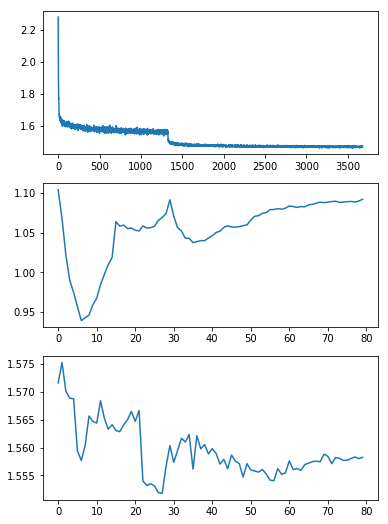

In [18]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/1 hidden layers/40 neurons/train_from_scratch/'
run_num = 4
idxes = [1, 5, 10, 15, 20, 25, 30, 35, 40]
ylim = 130

# scrollable_loss_vs_hist(parent_dir, run_num, ylim=ylim)
loss_vs_angle(parent_dir, run_num)
# scrollable_loss_vs_heatmap(parent_dir, run_num)

In [7]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/1 hidden layers/5 neurons/train_from_scratch/'
run_num = 2
idxes = [1, 5, 10, 15, 20, 25, 30, 35, 40]
ylim = 3.5

# scrollable_loss_vs_hist(parent_dir, run_num, ylim=ylim)
loss_vs_angle(parent_dir, run_num)
# scrollable_loss_vs_heatmap(parent_dir, run_num)

NameError: name 'loss_vs_angle' is not defined

# Polished plotting stuff

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib qt

def scrollable_loss_vs_hist_2(parent_dir, run_num, idxes=None, ylim=None, net2net=False, steps=1):
    
    x = np.load(os.path.join(parent_dir, 'cos_dists_' + str(run_num) + '.npy'))
    
    offset = 0

    loss_curve = np.load(parent_dir + 'loss_curve_' + str(run_num) + '.npy')
    
    num_neurons = x.shape[1]
    iu2 = np.triu_indices(num_neurons, k=1)
    
    if idxes is None:
        if net2net:
            idxes = np.arange(40)
            offset = 40
        else:
            idxes = np.arange(80)

    batch_idxes = [46*(i + offset) for i in idxes]

    # now the real code :) 
    global curr_pos
    curr_pos = 0

    def key_event(e):
        global curr_pos

        if e.key == "right":
            curr_pos = curr_pos + steps
        elif e.key == "left":
            curr_pos = curr_pos - steps
        else:
            return
        curr_pos = curr_pos % len(x)


        ax1.cla()
        ax1.plot(loss_curve)
        ax1.plot(curr_pos + offset*46, loss_curve[curr_pos + offset*46], marker='o', label='batch ' + str(curr_pos))
        ax1.legend()

        ax2.cla()
        plots = x[curr_pos]
        print(sum(np.abs(plots[iu2])>0.5))
        ax2.hist(plots[iu2], bins=20)
        ax2.set_xlim([-1, 1])
        if ylim is not None:
            ax2.set_ylim([0, ylim])
        fig.canvas.draw()

    fig = plt.figure()
    fig.canvas.mpl_connect('key_press_event', key_event)
    ax1 = fig.add_subplot(211)
    ax1.plot(loss_curve)
    ax1.plot(1 + offset*46, loss_curve[1 + offset*46], marker='o')

    ax2 = fig.add_subplot(212)
    plots = x[0]
    ax2.hist(plots[iu2], bins=20)
    ax2.set_xlim([-1, 1])
    if ylim is not None:
        ax2.set_ylim([0, ylim])
    plt.show()   

In [7]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/40 neurons/smart_init_ortho_regrotation_noise_0.0/'
run_num = 0
ylim = 200

scrollable_loss_vs_hist_2(parent_dir, run_num, ylim=ylim, steps=1, net2net=True)

780
780
780
780


In [10]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/40 neurons/smart_init_rotation_noise_1.0/'
run_num = 0
ylim = 200

scrollable_loss_vs_hist_2(parent_dir, run_num, ylim=ylim, steps=40, net2net=True)

20
20
20
20
20


In [17]:
%matplotlib inline

In [54]:
60000/64

937.5

In [81]:
x = np.linspace(-2,2,100)
y = np.ones(100)
y[x<-1] = 0
y[x>1] = 0

In [82]:
plt.plot(x,y)

# Videos for presentation

In [3]:
from matplotlib.animation import FuncAnimation

%matplotlib qt

In [4]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/40 neurons/smart_init_noise_0.5/'
run_num = 0
ylim = 200
steps = 10
net2net=True
speed_factor = 10

x = np.load(os.path.join(parent_dir, 'cos_dists_' + str(run_num) + '.npy'))
    
offset = 0
if net2net:
    offset = 40

loss_curve = np.load(parent_dir + 'loss_curve_' + str(run_num) + '.npy')

num_neurons = x.shape[1]
iu2 = np.triu_indices(num_neurons, k=1)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(loss_curve)
ax1.plot(1 + offset*46, loss_curve[1 + offset*46], marker='o')
ax1.set_title('Learning curve')
ax1.set_ylabel('Loss on Training Set')
ax1.set_xlabel('Epochs of training')

ax2 = fig.add_subplot(212)
ax2.set_xlim([-1, 1])
plots = x[0]
ax2.hist(plots[iu2], bins=20)
ax2.set_xlim([-1, 1])
if ylim is not None:
    ax2.set_ylim([0, ylim])
ax2.set_title('Histogram of cosine similarities')
ax2.set_xlabel('Cosine Similarity')

plt.tight_layout()
plt.show()

def animate(frame):

    curr_pos = steps*frame

    ax1.cla()
    ax1.plot(loss_curve)
    ax1.plot(curr_pos + offset*46, loss_curve[curr_pos + offset*46], marker='o', label='batch ' + str(curr_pos))
    ax1.legend()
    ax1.set_title('Learning curve')
    ax1.set_ylabel('Loss on Training Set')
    ax1.set_xlabel('Epochs of training')

    ax2.cla()
    plots = x[curr_pos]
    ax2.hist(plots[iu2], bins=20)
    ax2.set_xlim([-1, 1])
    if ylim is not None:
        ax2.set_ylim([0, ylim])
    ax2.set_title('Histogram of cosine similarities')
    ax2.set_xlabel('Cosine Similarity')
    return

animation = FuncAnimation(
    # Your Matplotlib Figure object
    fig,
    # The function that does the updating of the Figure
    animate,
    # Frame information (here just frame number)
    np.arange(100),
    # Frame-time in ms; i.e. for a given frame-rate x, 1000/x
    interval=1000 / speed_factor,
    repeat=False
)

In [150]:
animation.save('/home/manu/Presentations/WeightSymmetry/video_ortho_reg_0_17.mp4')